In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

from pathlib import Path

import requests

# Impor the API key
from api_keys import EIA_KEY

In [2]:
# # Linear regression on Southern Hemisphere

# plt.figure(figsize=(9,6))
# x_values1 = Electricity_df["period"]
# y_values1 = Electricity_df["price"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
# regress_values1 = x_values1 * slope + intercept

# line_eq1 = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))


# plt.scatter(x_values1,y_values1, marker="o", color="darkblue", s=[70], edgecolors="black")
# plt.plot(x_values1,regress_values1, "red", linewidth=2)

# plt.title("\nprice/time", fontsize=22)
# plt.ylabel("price", fontsize=14, color="black")
# plt.xlabel("2020 - 2021", fontsize=14, color="black")

# plt.annotate(line_eq1,(-20, 15), fontsize=18, color="red")
# plt.annotate("r-squared = {:.3f}".format(round(rvalue**2,2)), (-50, 15))







# plt.xlim(min(Electricity_df["period"]-5), max(Electricity_df["period"])+3)


# # Show plot:
# plt.show()



# World Motor Vehicle Production

## - Cleaning DATA

In [40]:
World_Passenger_car_Production =pd.read_excel(r"Ev_Data/Passenger_car.xlsx",dtype=str)



In [53]:
#transpose to make rows as dates
World_Passenger_car_Production_DF = World_Passenger_car_Production.T.rename_axis("Year").replace(["U","Z","N"],0)
World_Passenger_car_Production_DF

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Year,,,,,,,,,,,,,,,,,,,,,
Unnamed: 0,Total world,Argentina,Australia,Austria,Belgium,Brazil,Canada,China,Czech Republicb,Finland,...,South Africa,South Korea,Spain,Sweden,Taiwan,Turkey,United Kingdom,United States,Venezuela,"Yugoslavia, Federal Republic ofc"
1961,11391,78,182,8,0,98,328,0,59,0,...,0,0,55,110,0,0,1004,5522,0,15
1971,26453,193,393,1,279,342,1083,0,149,0,...,0,0,453,287,0,13,1742,8584,0,114
1981,27407,139,352,7,216,406,803,0,181,0,...,0,69,855,258,0,25,955,6253.138,0,240
1991,35287.864,114,269,14,253,705,1060,81,173,0,...,0,1158,1943,269,266,196,1237,5439.864,0,213
1994,35717.22,338.355,323,44.533,408.541,1248,1214,250,174,0,...,0,1805.895,1974,352.951,291.347,213,1466.823,6601.22,0,7.648
1995,36099.967,227,314,59,386,1297,1337,321,208,0,...,0,2003,2131,388,282,233,1532,6325.967,0,8
1996,37318,269,303,97,368,1459,1279,382,263,0,...,0,2265,2213,368,265,208,1686,6035.235,0,9
1997,38480.921,366,320,98,356,1680,1374,482,321,0,...,0,2308,2342,376,268,243,1698,5878.221,0,11


In [54]:
# Extract values from first row in a list to then designated into the new columns names
Titles_col = World_Passenger_car_Production_DF.iloc[0].tolist()
World_Passenger_car_Production_DF = World_Passenger_car_Production_DF.tail(-1)
World_Passenger_car_Production_DF.columns = Titles_col

In [55]:
World_Passenger_car_Production_DF = World_Passenger_car_Production_DF.loc[:,:]
World_Passenger_car_Production_DF = World_Passenger_car_Production_DF.astype(float).round(2)
World_Passenger_car_Production_DF = World_Passenger_car_Production_DF[World_Passenger_car_Production_DF.index > 2018]
#Drop columns containing all zero, ~ keeping the one that only containing non all 0. information not given by source
World_Passenger_car_Production_DF = World_Passenger_car_Production_DF.loc[:, ~(World_Passenger_car_Production_DF == 0).all()]

World_Passenger_car_Production_DF

,Total world,Argentina,Austria,Belgium,Brazil,Canada,China,Czech Republicb,Finland,France,...,Portugal,Russia,Slovakia,South Africa,South Korea,Spain,Sweden,Turkey,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2019,51094.36,108.36,158.46,247.02,2448.60,461.37,10758.48,1427.56,114.78,1642.00,...,282.14,1518.98,1131.74,344.92,1422.16,2248.02,279.0,982.64,1303.14,2511.71
2020,40582.73,93.00,109.52,237.06,1608.88,327.68,9734.63,1152.90,86.27,919.73,...,211.28,1256.82,970.10,235.60,1148.02,1800.66,249.0,855.04,920.93,1924.40
2021,40582.73,184.11,124.76,224.18,1707.85,288.24,10568.42,1105.22,93.17,917.91,...,229.22,1349.34,999.84,237.00,1033.05,1662.17,258.0,782.84,859.58,1562.72


In [44]:
#Extracting Just World Sale Data
World_Sale_DF = World_Passenger_car_Production_DF[["Total world"]]
World_Sale_DF

,Total world
Year,
2019,51094.36
2020,40582.73
2021,40582.73


In [59]:
#Fifltering in a new DF where is not USA and World porduction
Countries_Passenger_car_Production_NoUSA_DF = World_Passenger_car_Production_DF.iloc[:,1:].drop("United States", axis=1)
Countries_Passenger_car_Production_NoUSA_DF

,Argentina,Austria,Belgium,Brazil,Canada,China,Czech Republicb,Finland,France,Germany,...,Poland,Portugal,Russia,Slovakia,South Africa,South Korea,Spain,Sweden,Turkey,United Kingdom
Year,,,,,,,,,,,,,,,,,,,,,
2019,108.36,158.46,247.02,2448.60,461.37,10758.48,1427.56,114.78,1642.00,4663.75,...,434.7,282.14,1518.98,1131.74,344.92,1422.16,2248.02,279.0,982.64,1303.14
2020,93.00,109.52,237.06,1608.88,327.68,9734.63,1152.90,86.27,919.73,3515.40,...,278.9,211.28,1256.82,970.10,235.60,1148.02,1800.66,249.0,855.04,920.93
2021,184.11,124.76,224.18,1707.85,288.24,10568.42,1105.22,93.17,917.91,3096.16,...,260.8,229.22,1349.34,999.84,237.00,1033.05,1662.17,258.0,782.84,859.58


In [60]:
#Fifltering in a new DF where is not USA and World porduction
Countries_Passenger_car_Production_andUSA_DF = World_Passenger_car_Production_DF.iloc[:,1:]
Countries_Passenger_car_Production_andUSA_DF

,Argentina,Austria,Belgium,Brazil,Canada,China,Czech Republicb,Finland,France,Germany,...,Portugal,Russia,Slovakia,South Africa,South Korea,Spain,Sweden,Turkey,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2019,108.36,158.46,247.02,2448.60,461.37,10758.48,1427.56,114.78,1642.00,4663.75,...,282.14,1518.98,1131.74,344.92,1422.16,2248.02,279.0,982.64,1303.14,2511.71
2020,93.00,109.52,237.06,1608.88,327.68,9734.63,1152.90,86.27,919.73,3515.40,...,211.28,1256.82,970.10,235.60,1148.02,1800.66,249.0,855.04,920.93,1924.40
2021,184.11,124.76,224.18,1707.85,288.24,10568.42,1105.22,93.17,917.91,3096.16,...,229.22,1349.34,999.84,237.00,1033.05,1662.17,258.0,782.84,859.58,1562.72


In [47]:
#DF Just USA Production
USA_Sales_DF1 = World_Passenger_car_Production_DF[["United States"]]
USA_Sales_DF1

,United States
Year,
2019,2511.71
2020,1924.40
2021,1562.72


## - Analizis of Data

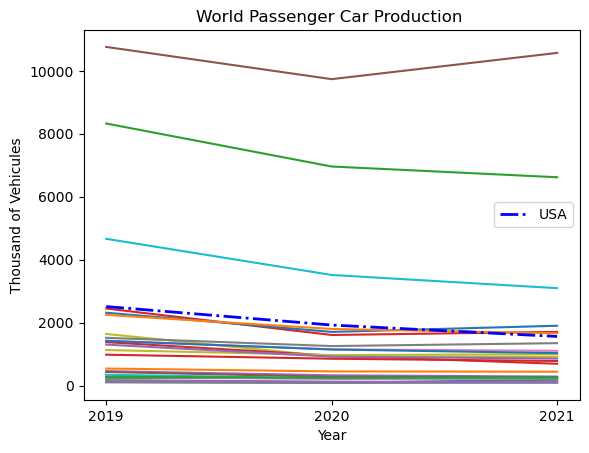

In [61]:

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data from the first data frame in one color
ax.plot(Countries_Passenger_car_Production_NoUSA_DF.index, Countries_Passenger_car_Production_NoUSA_DF)

# Plot data from the second data frame in a different color
ax.plot(USA_Sales_DF1.index, USA_Sales_DF1, color="blue", label="USA",linestyle="-.",linewidth=2)

# Set labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Thousand of Vehicules")
ax.set_title("World Passenger Car Production ")

x_values = [2019, 2020, 2021]
ax.set_xticks(x_values)



# Add legend
ax.legend()

# Show the plot
plt.show()

In [50]:
Stat_Country_Total_Production_df = Countries_Passenger_car_Production_andUSA_DF.describe()
Stat_Country_Total_Production_df

,Argentina,Austria,Belgium,Brazil,Canada,China,Czech Republicb,Finland,France,Germany,...,Portugal,Russia,Slovakia,South Africa,South Korea,Spain,Sweden,Turkey,United Kingdom,United States
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,128.490000,130.913333,236.086667,1921.776667,359.096667,10353.843333,1228.560000,98.073333,1159.880000,3758.436667,...,240.880000,1375.046667,1033.893333,272.506667,1201.076667,1903.616667,262.000000,873.506667,1027.883333,1999.610000
std,48.776743,25.043533,11.451067,458.918167,90.740038,544.609553,173.980159,14.874039,417.529159,811.563133,...,36.840896,132.957102,86.032520,62.715693,199.907242,306.194566,15.394804,101.171999,240.344815,478.944582
min,93.000000,109.520000,224.180000,1608.880000,288.240000,9734.630000,1105.220000,86.270000,917.910000,3096.160000,...,211.280000,1256.820000,970.100000,235.600000,1033.050000,1662.170000,249.000000,782.840000,859.580000,1562.720000
25%,100.680000,117.140000,230.620000,1658.365000,307.960000,10151.525000,1129.060000,89.720000,918.820000,3305.780000,...,220.250000,1303.080000,984.970000,236.300000,1090.535000,1731.415000,253.500000,818.940000,890.255000,1743.560000
50%,108.360000,124.760000,237.060000,1707.850000,327.680000,10568.420000,1152.900000,93.170000,919.730000,3515.400000,...,229.220000,1349.340000,999.840000,237.000000,1148.020000,1800.660000,258.000000,855.040000,920.930000,1924.400000
75%,146.235000,141.610000,242.040000,2078.225000,394.525000,10663.450000,1290.230000,103.975000,1280.865000,4089.575000,...,255.680000,1434.160000,1065.790000,290.960000,1285.090000,2024.340000,268.500000,918.840000,1112.035000,2218.055000
max,184.110000,158.460000,247.020000,2448.600000,461.370000,10758.480000,1427.560000,114.780000,1642.000000,4663.750000,...,282.140000,1518.980000,1131.740000,344.920000,1422.160000,2248.020000,279.000000,982.640000,1303.140000,2511.710000


In [32]:
Median1_DF = Stat_Country_Total_Production_df.loc[["50%"]].T
Median1_DF

,50%
Argentina,108.36
Austria,124.76
Belgium,237.06
Brazil,1707.85
Canada,327.68
China,10568.42
Czech Republicb,1152.90
Finland,93.17
France,919.73
Germany,3515.40


In [56]:
top_5_max_World_df = Median1_DF.nlargest(5, "50%")
top_5_max_World_df.columns = ["Total Median by Year inThe World"]
top_5_max_World_df

,Total Median by Year inThe World
China,10568.42
Japan,6960.02
Germany,3515.40
United States,1924.40
India,1902.08


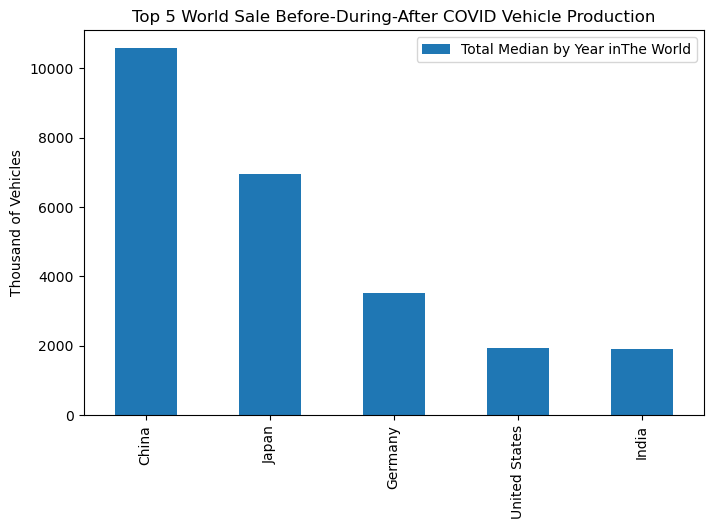

In [58]:

plott = top_5_max_World_df.plot(figsize=(8,5),
                                kind="bar",
                                title="Top 5 World Sale Before-During-After COVID Vehicle Production")

plott.set_ylabel("Thousand of Vehicles")

plt.show()



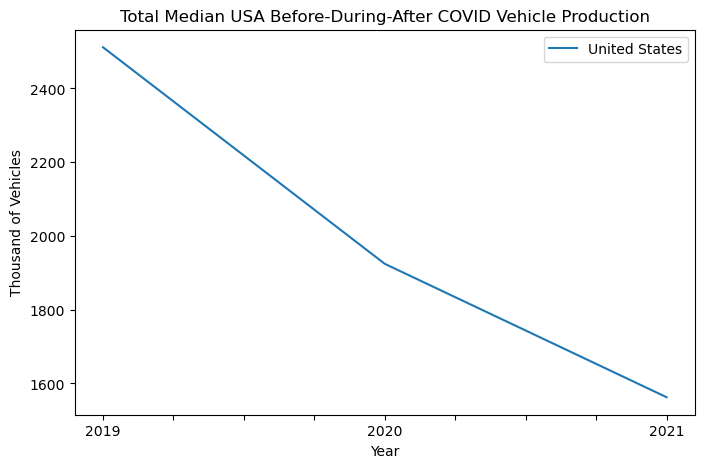

In [62]:

A = USA_Sales_DF1.plot(figsize=(8,5),
                                kind="line",
                                title="Total Median USA Before-During-After COVID Vehicle Production")

A.set_ylabel("Thousand of Vehicles")

plt.show()

In [63]:
# Countries_Passenger_car_Production_DF.plot(figsize=(8,5),
#                                            kind="line",
#                                        title="World Sale")
# plt.show()



# Anual Vehicule Production Sale USA

In [64]:
Anual_Vehicule_Production_Sale_USA = pd.read_excel(r"Ev_Data/Anual_Vehicule_Production_Sale_USA.xlsx",dtype=str)
Anual_Vehicule_Production_Sale_USA = Anual_Vehicule_Production_Sale_USA.T.replace("N", 0)

Anual_Vehicule_Production_Sale_USA


,0,1,2
Unnamed: 0,"Domestic sales, total",Passenger cars,Commercial vehicles
1960,0,0,0
1965,10302,8763,1539
1970,8849.335,7112.067,1737.268
1975,9298.315,6945.034,2353.281
1980,8594.487,6579.778,2014.709
1985,12109.999,8204.67,3905.329
1990,11133.504,6916.86,4216.644
1991,9975.798,6161.573,3814.225
1992,10767.685,6285.916,4481.769


In [65]:
#locating tittles
Anual_Vehicule_Production_Sale_USA.iloc[[0]]

,0,1,2
Unnamed: 0,"Domestic sales, total",Passenger cars,Commercial vehicles


In [66]:
Titles_col = Anual_Vehicule_Production_Sale_USA.iloc[0].tolist()


In [67]:
Anual_Vehicule_Production_Sale_USA.columns = Titles_col

Anual_Vehicule_Production_Sale_USA


,"Domestic sales, total",Passenger cars,Commercial vehicles
Unnamed: 0,"Domestic sales, total",Passenger cars,Commercial vehicles
1960,0,0,0
1965,10302,8763,1539
1970,8849.335,7112.067,1737.268
1975,9298.315,6945.034,2353.281
1980,8594.487,6579.778,2014.709
1985,12109.999,8204.67,3905.329
1990,11133.504,6916.86,4216.644
1991,9975.798,6161.573,3814.225
1992,10767.685,6285.916,4481.769


In [68]:
Anual_Vehicule_Production_Sale_USA = Anual_Vehicule_Production_Sale_USA.tail(-1)

In [70]:
Anual_Vehicule_Production_Sale_USA = Anual_Vehicule_Production_Sale_USA.loc[:,:].astype(float).round(2)
Anual_Vehicule_Production_Sale_USA = Anual_Vehicule_Production_Sale_USA[Anual_Vehicule_Production_Sale_USA.index > 2018]
Anual_Vehicule_Production_Sale_USA

,"Domestic sales, total",Passenger cars,Commercial vehicles
2019,13676.87,3543.92,10132.95
2020,11571.02,2559.78,9011.24
2021,11830.65,2375.73,9454.92


In [71]:
Anual_Vehicule_Production_Sale_USA

,"Domestic sales, total",Passenger cars,Commercial vehicles
2019,13676.87,3543.92,10132.95
2020,11571.02,2559.78,9011.24
2021,11830.65,2375.73,9454.92


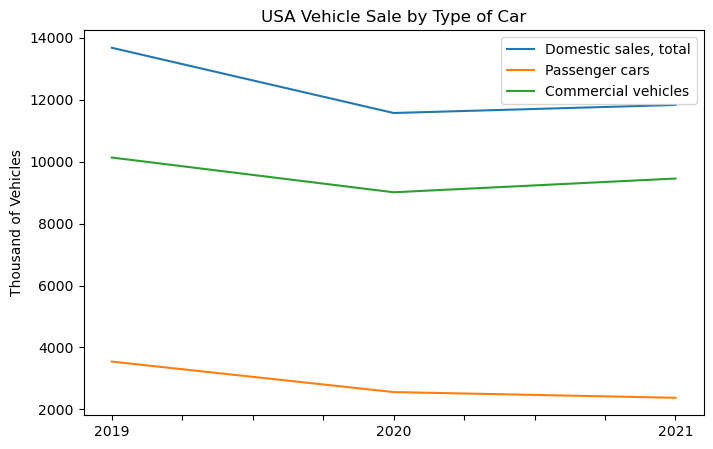

In [85]:
B = Anual_Vehicule_Production_Sale_USA.plot(figsize=(8,5),
                                           kind="line",
                                       title="USA Vehicle Sale by Type of Car")



B.set_ylabel("Thousand of Vehicles")

plt.show()


# Electric Vehicle Sales

In [78]:
Electric_Vehicle_Sales = pd.read_excel(r"Ev_Data/Electric_Vehicule_Sales.xlsx")
Electric_Vehicle_Sales= Electric_Vehicle_Sales.T
Electric_Vehicle_Sales

,0,1,2
Unnamed: 0,Hybrid electric,Plug-in hybrid-electric,Electric
2000,9350,Z,Z
2001,20282,Z,Z
2002,36042,Z,Z
2003,47566,Z,Z
2004,84233,Z,Z
2005,205876,Z,Z
2006,251864,Z,Z
2007,351071,Z,Z
2008,315763,Z,Z


In [81]:
Electric_Vehicle_Sales.columns = ["Hybrid Electric","Plug-in hybrid-electric","Electric"]

Electric_Vehicle_Sales = Electric_Vehicle_Sales.rename_axis("Year").replace("Z",0)
Electric_Vehicle_Sales = Electric_Vehicle_Sales.tail(-1)


In [82]:
Electric_Vehicle_Sales = Electric_Vehicle_Sales.loc[:,:]
Electric_Vehicle_Sales = Electric_Vehicle_Sales.astype(float).round(2)
Electric_Vehicle_Sales = Electric_Vehicle_Sales[Electric_Vehicle_Sales.index > 2018]
#Drop columns containing all zero, ~ keeping the one that only containing non all 0. information not given by source

Electric_Vehicle_Sales



,Hybrid Electric,Plug-in hybrid-electric,Electric
Year,,,
2019,399444.0,85791.0,233822.0
2020,455067.0,69049.0,238540.0
2021,798992.0,173457.0,459426.0


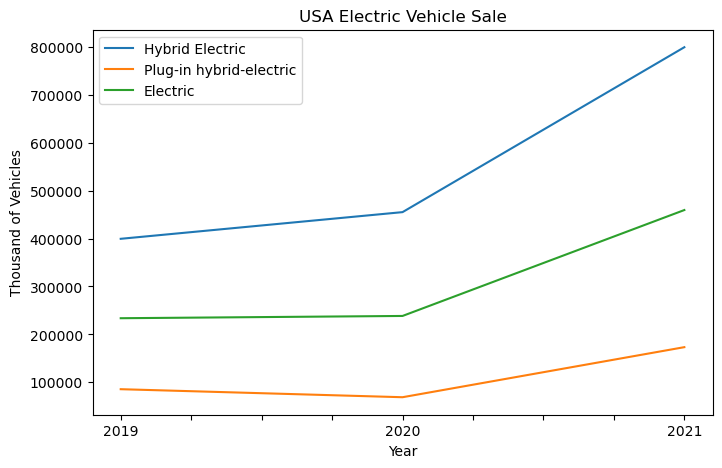

In [86]:
C = Electric_Vehicle_Sales.plot(figsize=(8,5),
                                           kind="line",
                                       title="USA Electric Vehicle Sale")



C.set_ylabel("Thousand of Vehicles")

plt.show()


# Energy Investment

In [132]:
Energy_Investment =pd.read_excel(r"Ev_Data/Energy_Investment.xlsx",index_col="North America",dtype=str)
Energy_Investment_df = Energy_Investment.dropna()
btyear = Energy_Investment_df
btyear


,2015,2016,2017,2018,2019,2020,2021,2022,2023
North America,,,,,,,,,
Total (billion $2022),493,463,496,504,463,384,425,482,519
of which: Clean energy,197,200,192,196,213,224,237,267,316
Supply (by type),434,405,440,448,404,325,363,410,426
Fossil fuels without CCUS,296,263,303,308,250,160,188,215,203
Renewables,62.9,62,53.3,60.8,72.8,77.2,76.6,84.2,96.9
Electricity networks,67.9,69.4,71.1,71.5,74.7,80.2,87.6,93.6,92.5
Other supply,7.58,10.4,11.9,7.75,6.82,7.68,10.1,17,32.9
End-use,58.1,58.4,56,56.1,58.2,59.2,62.6,71.9,93.7
Energy efficiency,45.1,45.5,44.2,42.2,41,44.9,42.8,47.2,61.2


In [133]:
btyear = btyear.loc[:,:]
btyear = btyear.astype(float).round(0)

btyear


,2015,2016,2017,2018,2019,2020,2021,2022,2023
North America,,,,,,,,,
Total (billion $2022),493.0,463.0,496.0,504.0,463.0,384.0,425.0,482.0,519.0
of which: Clean energy,197.0,200.0,192.0,196.0,213.0,224.0,237.0,267.0,316.0
Supply (by type),434.0,405.0,440.0,448.0,404.0,325.0,363.0,410.0,426.0
Fossil fuels without CCUS,296.0,263.0,303.0,308.0,250.0,160.0,188.0,215.0,203.0
Renewables,63.0,62.0,53.0,61.0,73.0,77.0,77.0,84.0,97.0
Electricity networks,68.0,69.0,71.0,72.0,75.0,80.0,88.0,94.0,92.0
Other supply,8.0,10.0,12.0,8.0,7.0,8.0,10.0,17.0,33.0
End-use,58.0,58.0,56.0,56.0,58.0,59.0,63.0,72.0,94.0
Energy efficiency,45.0,46.0,44.0,42.0,41.0,45.0,43.0,47.0,61.0


In [134]:
btyear = btyear.T

In [135]:

bytype_ofEnergy = btyear[btyear.index > 2018]
bytype_ofEnergy

North America,Total (billion $2022),of which: Clean energy,Supply (by type),Fossil fuels without CCUS,Renewables,Electricity networks,Other supply,End-use,Energy efficiency,Other end-use,...,Power,Generation,Coal,Oil and natural gas,Nuclear,Renewables,Fossil fuels: with CCUS,Storage,Electricity networks,Memo: Oil & gas upstream
2019,463.0,213.0,404.0,250.0,73.0,75.0,7.0,58.0,41.0,14.0,...,168.0,92.0,0.0,15.0,7.0,70.0,0.0,1.0,75.0,172.0
2020,384.0,224.0,325.0,160.0,77.0,80.0,8.0,59.0,45.0,12.0,...,175.0,93.0,0.0,12.0,7.0,74.0,0.0,2.0,80.0,93.0
2021,425.0,237.0,363.0,188.0,77.0,88.0,10.0,63.0,43.0,17.0,...,185.0,94.0,0.0,12.0,7.0,74.0,0.0,4.0,88.0,105.0
2022,482.0,267.0,410.0,215.0,84.0,94.0,17.0,72.0,47.0,22.0,...,205.0,105.0,0.0,13.0,10.0,82.0,0.0,6.0,94.0,125.0
2023,519.0,316.0,426.0,203.0,97.0,92.0,33.0,94.0,61.0,30.0,...,230.0,124.0,0.0,12.0,12.0,94.0,5.0,13.0,92.0,116.0


### Total Investment

In [136]:
Total_investment = bytypeOfEnergy.iloc[0:2]
Total_investment


,2015,2016,2017,2018,2019,2020,2021,2022,2023
North America,,,,,,,,,
Total (billion $2022),493.0,463.0,496.0,504.0,463.0,384.0,425.0,482.0,519.0
of which: Clean energy,197.0,200.0,192.0,196.0,213.0,224.0,237.0,267.0,316.0


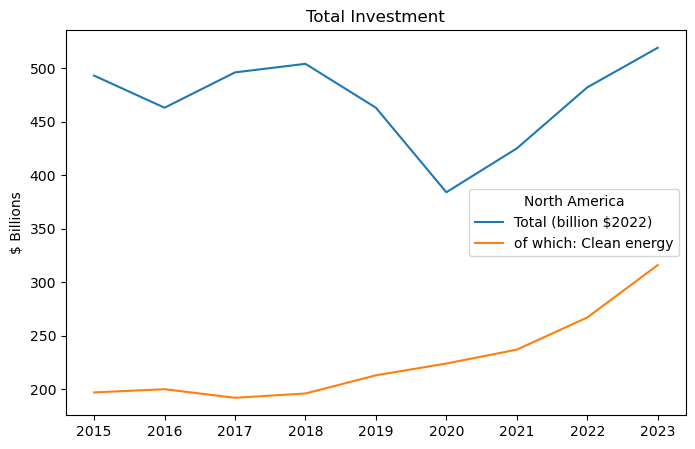

In [143]:
D = Total_investment.T.plot(figsize=(8,5),
                                           kind="line",
                                       title="Total Investment")



D.set_ylabel("$ Billions")

plt.show()


### Investment by Type of Supply

In [139]:
Supply_Energy_byType_df = bytypeOfEnergy.iloc[3:6]
Supply_Energy_byType_df


,2015,2016,2017,2018,2019,2020,2021,2022,2023
North America,,,,,,,,,
Fossil fuels without CCUS,296.0,263.0,303.0,308.0,250.0,160.0,188.0,215.0,203.0
Renewables,63.0,62.0,53.0,61.0,73.0,77.0,77.0,84.0,97.0
Electricity networks,68.0,69.0,71.0,72.0,75.0,80.0,88.0,94.0,92.0


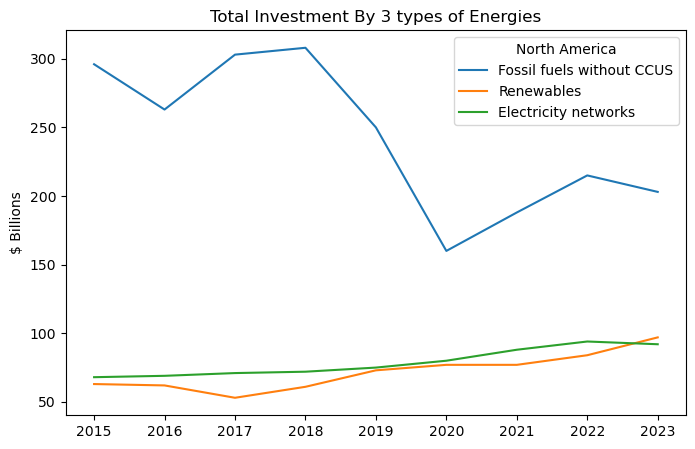

In [147]:
D = Supply_Energy_byType_df.T.plot(figsize=(8,5),
                                           kind="line",
                                       title="Total Investment By 3 types of Energies")



D.set_ylabel("$ Billions")

plt.show()


### Fuel Investemt

In [109]:
Fuel_Investemt = bytypeOfEnergy.loc[("Fossil fuels","Clean Fuels"),:]
Fuel_Investemt


,2019,2020,2021,2022,2023
North America,,,,,
Fossil fuels,235.00,148.0,176.00,202.00,191.00
Clean Fuels,1.59,1.8,1.68,3.23,4.12


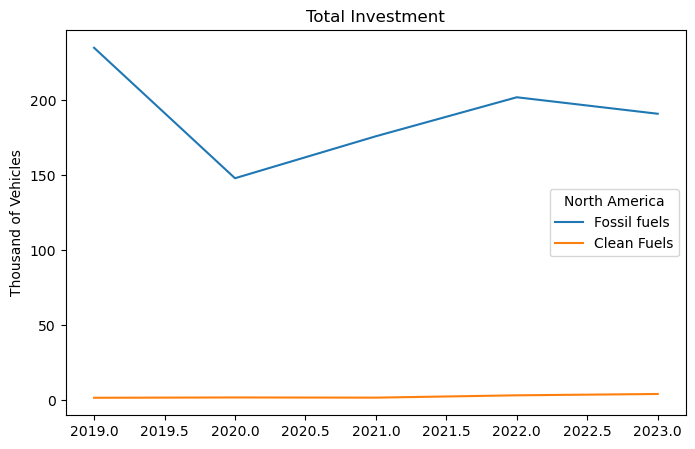

In [146]:
E = Fuel_Investemt.T.plot(figsize=(8,5),
                                           kind="line",
                                       title="Total Investment")



E.set_ylabel("Thousand of Vehicles")

plt.show()


# Electricity History Sale Data

### API request using the params dictionaty and convert to JSON

In [199]:

base_url = f"https://api.eia.gov/v2/electricity/retail-sales/data?api_key={EIA_KEY}&data[]=price&facets[sectorid][]=RES&frequency=monthly&start=2020-01&end=2021-12&length=1000"


name_address = requests.get(base_url).json()
name_address

{'response': {'warnings': [{'warning': 'incomplete return',
    'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}],
  'total': 1488,
  'dateFormat': 'YYYY-MM',
  'frequency': 'monthly',
  'data': [{'period': '2020-05',
    'stateid': 'CO',
    'stateDescription': 'Colorado',
    'sectorid': 'RES',
    'sectorName': 'residential',
    'price': 11.93,
    'price-units': 'cents per kilowatthour'},
   {'period': '2020-06',
    'stateid': 'AL',
    'stateDescription': 'Alabama',
    'sectorid': 'RES',
    'sectorName': 'residential',
    'price': 12.84,
    'price-units': 'cents per kilowatthour'},
   {'period': '2020-03',
    'stateid': 'ENC',
    'stateDescription': 'East North Central',
    'sectorid': 'RES',
    'sectorName': 'residential',
    'price': 13.48,
    'price-units': 'cents per kilowatthour'},
   {'period': '2020-04',
    'stateid': 'CT',
    'stateDes

In [200]:
Electricity = name_address["response"]["data"]
Electricity_df = pd.DataFrame(Electricity)

Electricity_df



,period,stateid,stateDescription,sectorid,sectorName,price,price-units
0,2020-05,CO,Colorado,RES,residential,11.93,cents per kilowatthour
1,2020-06,AL,Alabama,RES,residential,12.84,cents per kilowatthour
2,2020-03,ENC,East North Central,RES,residential,13.48,cents per kilowatthour
3,2020-04,CT,Connecticut,RES,residential,23.79,cents per kilowatthour
4,2020-04,DE,Delaware,RES,residential,12.85,cents per kilowatthour
...,...,...,...,...,...,...,...
995,2021-10,NM,New Mexico,RES,residential,13.62,cents per kilowatthour
996,2021-10,NY,New York,RES,residential,20.66,cents per kilowatthour
997,2021-11,NY,New York,RES,residential,20.09,cents per kilowatthour
998,2021-11,NC,North Carolina,RES,residential,11.44,cents per kilowatthour


In [201]:
# Export  into a csv
Electricity_df.to_csv("./Ev_Data/Electricity_df.csv")

In [202]:
#Import Data Saved
Electricity_df_x = pd.read_csv("./Ev_Data/Electricity_df.csv")

# Display sample data
Electricity_df = Electricity_df.sort_values(["period"], ascending = [False])

In [203]:
Electricity_df["price"].describe()

count    1000.000000
mean       14.368040
std         4.529592
min         8.830000
25%        11.570000
50%        12.730000
75%        15.717500
max        35.850000
Name: price, dtype: float64

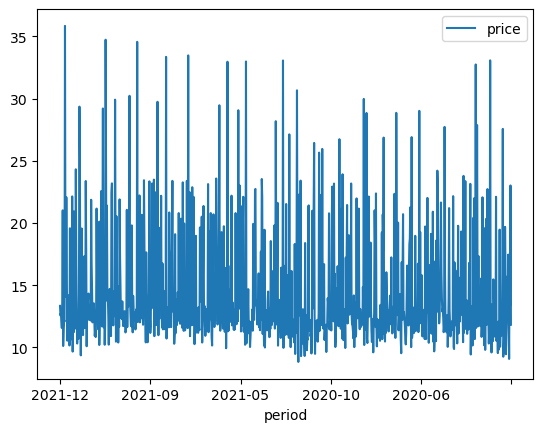

In [204]:
Electricity_df.plot(kind = "line", x="period", y = "price")

plt.show()

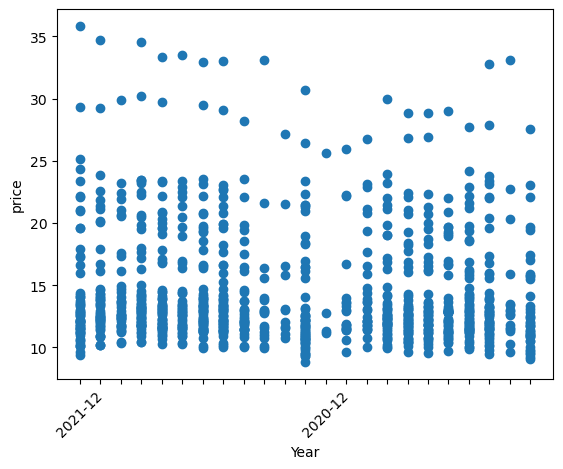

In [205]:
x = Electricity_df["period"]
y = Electricity_df["price"]

fig, ax = plt.subplots()

plt.plot(x, y, 'o')

every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.xlabel('Year') 
plt.xticks(rotation=45)
plt.ylabel("price")
plt.show()